In [ ]:
!pip install numpy streamlit pyngrok
import os
import cv2
import torch
import smtplib
import numpy as np
import threading
import streamlit as st
from IPython.display import Audio, display
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
from pyngrok import ngrok

In [ ]:
!pip install ultralytics==8.0.196 opencv-python roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image

ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dHPgntzjeI426K6xe5eg")
project = rf.workspace("egemenworkspace").project("knife_detection_project")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data=dataset.location + "/data.yaml", epochs=50, imgsz=640)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 t

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c8f84dc1150>
fitness: 0.5927264973556091
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.64663,     0.46619,      0.5635])
names: {0: 'blood', 1: 'knives', 2: 'stabbing'}
plot: True
results_dict: {'metrics/precision(B)': 0.901420404562106, 'metrics/recall(B)': 0.820986835021642, 'metrics/mAP50(B)': 0.8983017218911756, 'metrics/mAP50-95(B)': 0.558773694629435, 'fitness': 0.5927264973556091}
save_dir: PosixPath('runs/detect/train2')
speed: {'preprocess': 0.3206959137549767, 'inference': 2.525465610699776, 'loss': 0.0007886153001051683, 'postprocess': 4.430245130490034}

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Replace with your actual model

# Check the class names
class_names = model.names
print(class_names)

{0: 'blood', 1: 'knives', 2: 'stabbing'}


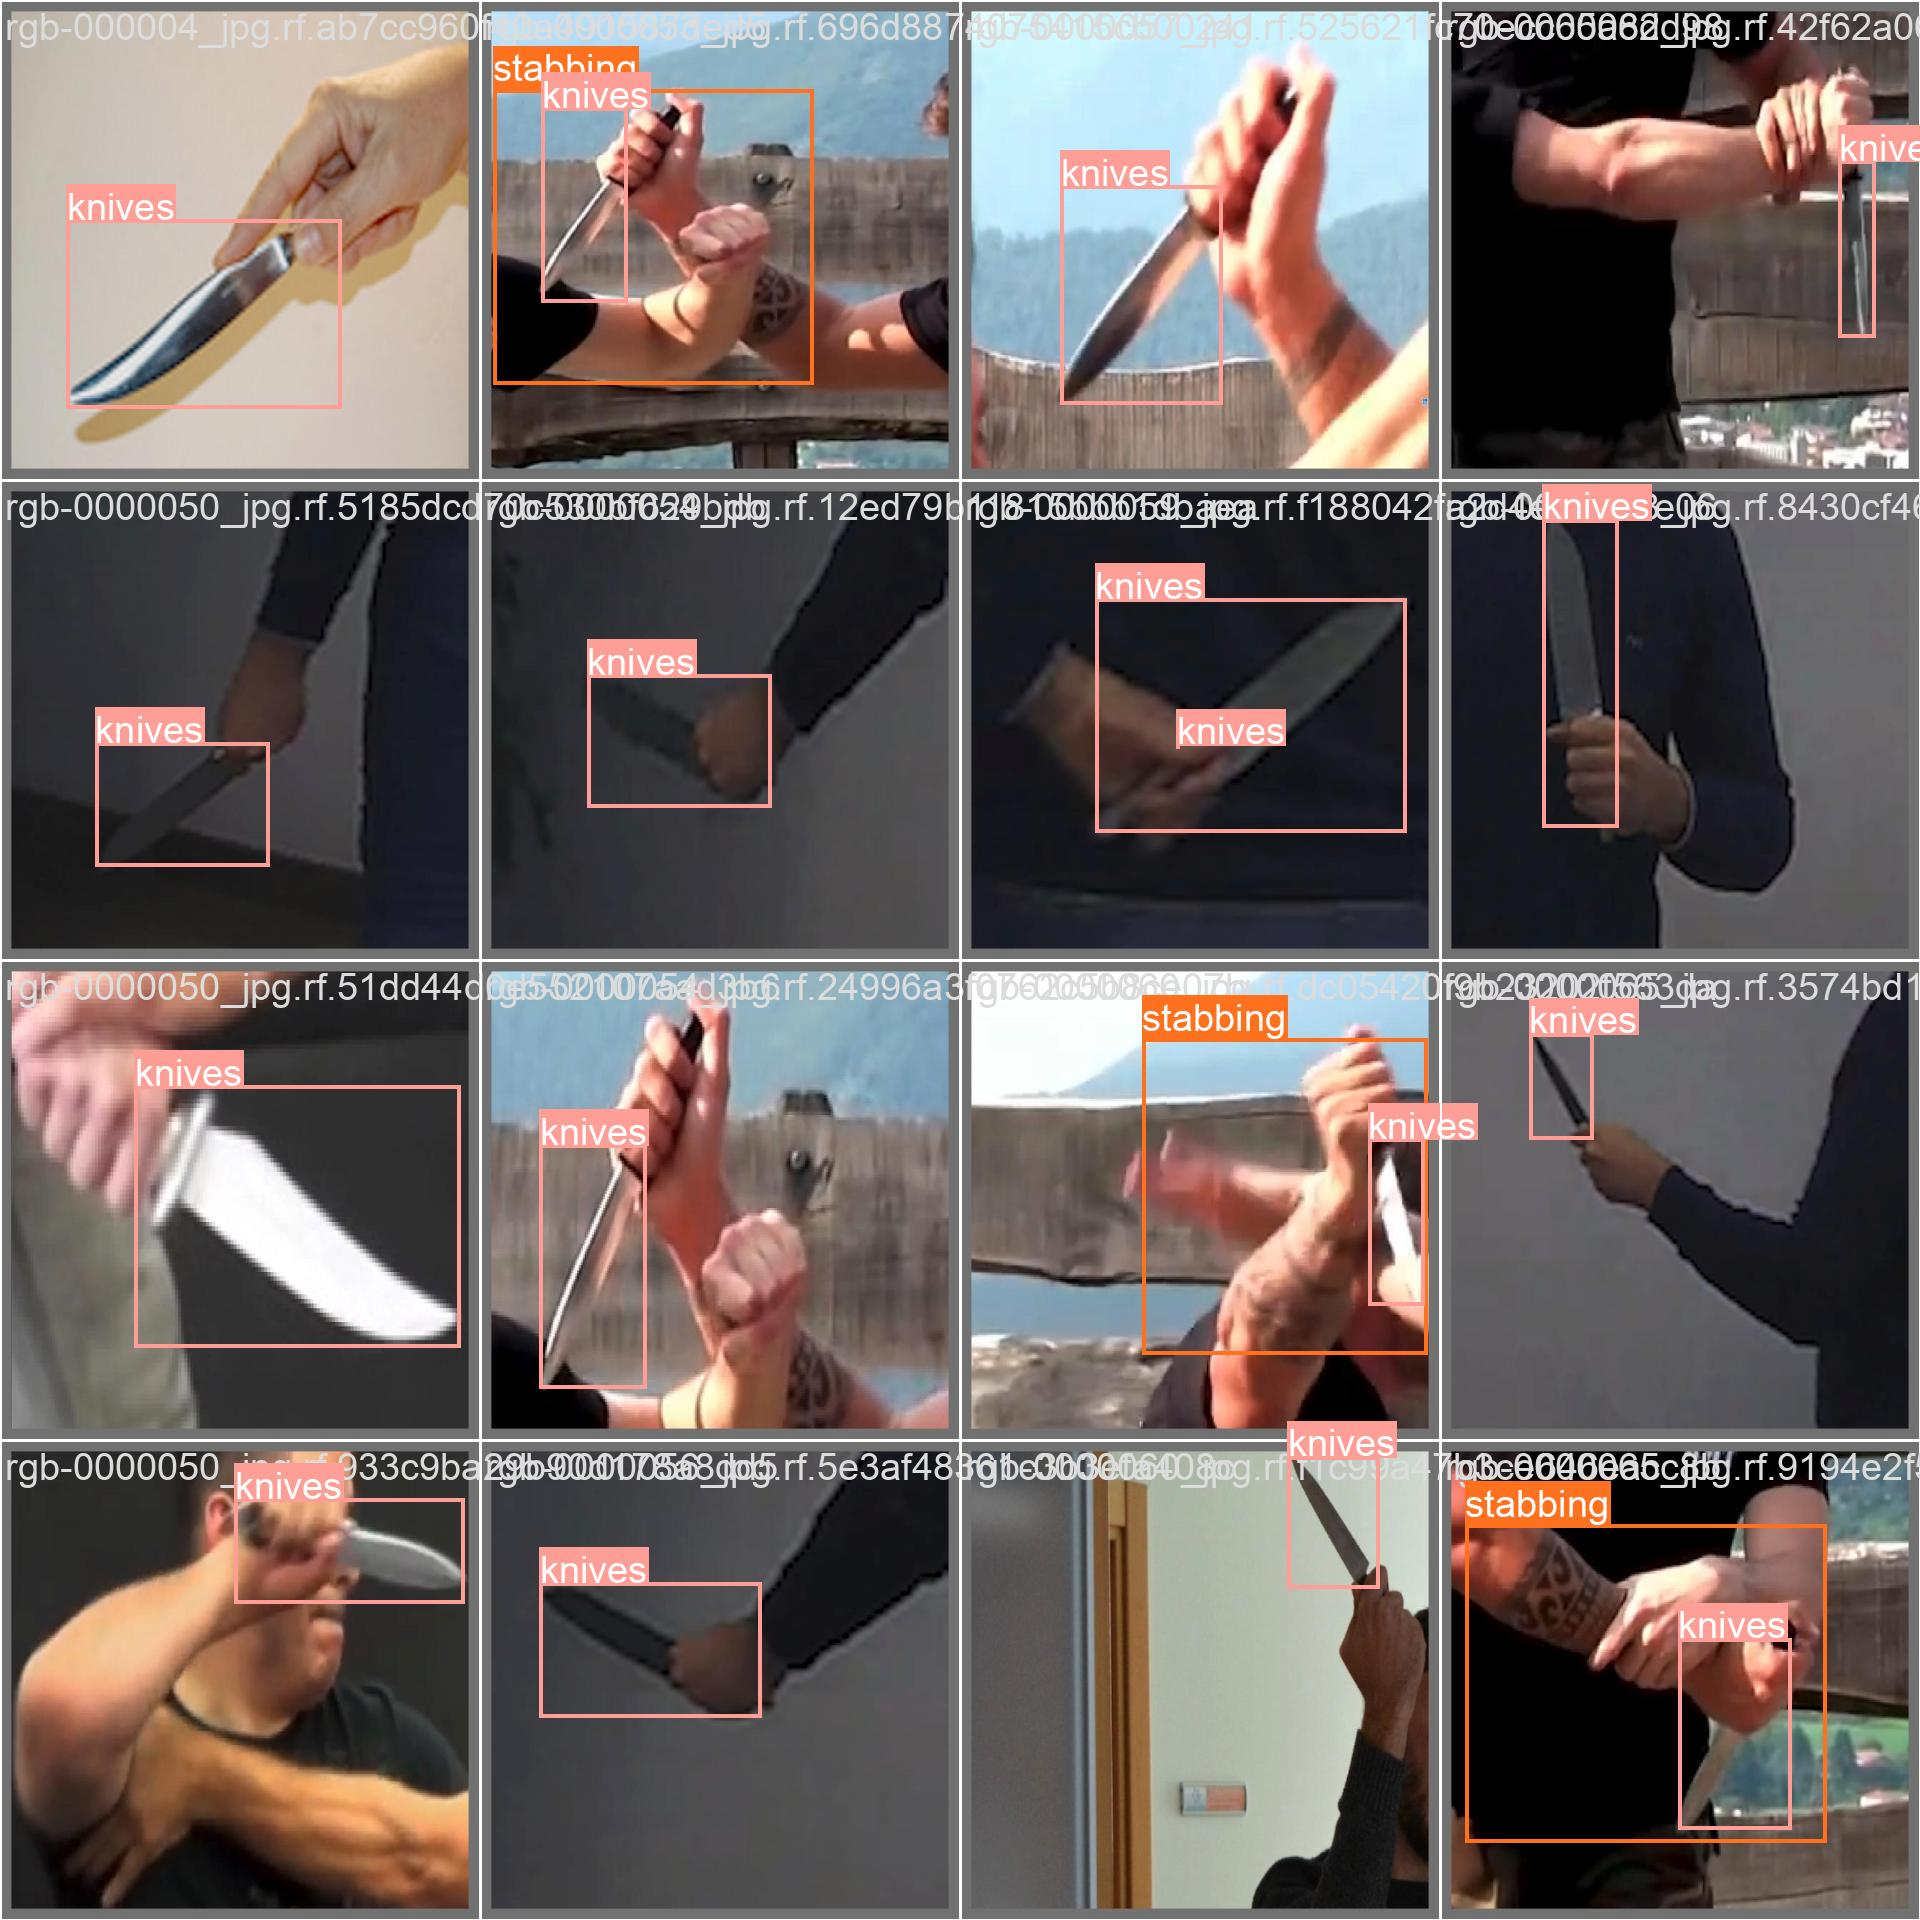

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch1_labels.jpg', width=600)

In [ ]:

# Load your trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Validate on your test dataset by specifying the path to your test data YAML
results = model.val(data='/content/knife_detection_project-3/data.yaml')

Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/knife_detection_project-3/valid/labels.cache... 156 images, 22 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.72it/s]
                   all        156        159      0.901      0.822      0.899      0.557
                 blood        156         13      0.909      0.923      0.963      0.642
                knives        156        103      0.962      0.728      0.882      0.465
              stabbing        156         43      0.833      0.814      0.851      0.565
Speed: 0.4ms preprocess, 5.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val



image 1/78 /content/knife_detection_project-3/test/images/rgb-00000105_jpg.rf.65bc41ae4769d67f219ee74004b62a5b.jpg: 640x640 1 knives, 1 stabbing, 8.4ms
image 2/78 /content/knife_detection_project-3/test/images/rgb-00000106_jpg.rf.a79b86d2be1fb608c948971781b5a5fb.jpg: 640x640 1 knives, 7.4ms
image 3/78 /content/knife_detection_project-3/test/images/rgb-00000115_jpg.rf.b6a7445db4e01cf25756ae35a64ec188.jpg: 640x640 1 knives, 7.4ms
image 4/78 /content/knife_detection_project-3/test/images/rgb-00000119_jpg.rf.4d182a9347d4113df0f226ac5d1e9556.jpg: 640x640 (no detections), 7.4ms
image 5/78 /content/knife_detection_project-3/test/images/rgb-0000013_jpg.rf.400017ae5b5fadf32bdcafd6fefe14eb.jpg: 640x640 (no detections), 7.4ms
image 6/78 /content/knife_detection_project-3/test/images/rgb-0000014_jpg.rf.e5449aac4bc991b2ecdf15fd77b3bc10.jpg: 640x640 1 knives, 7.4ms
image 7/78 /content/knife_detection_project-3/test/images/rgb-0000016_jpg.rf.eba60ebce8a9f806515c2e33195a4ce0.jpg: 640x640 1 knives, 7.

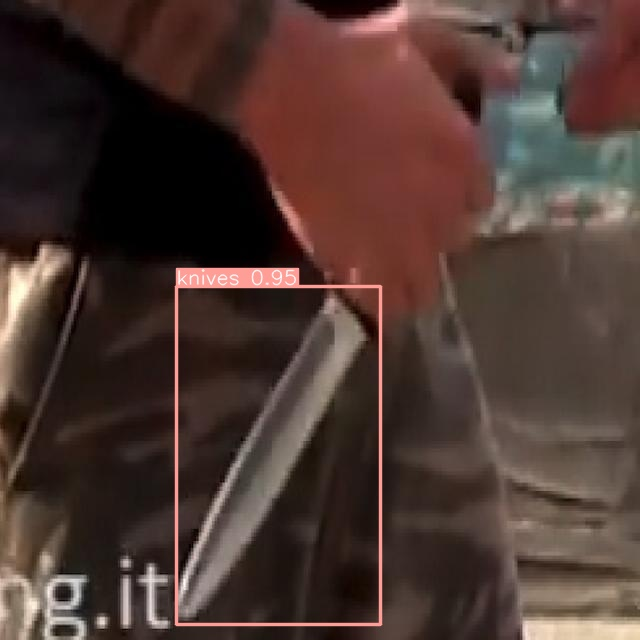

In [ ]:
model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)

# Directory containing the validation images
valid_images_dir = "/content/knife_detection_project-3/test/images"

# Make predictions on the validation images
results = model(valid_images_dir, save=True, conf=0.6)

# Display the results
import os
from IPython.display import display, Image

# Get the path of the first predicted image
pred_image_dir = results[0].save_dir
pred_image_files = os.listdir(pred_image_dir)
pred_image_path = os.path.join(pred_image_dir, pred_image_files[0])

# Display the predicted image
display(Image(filename=pred_image_path, width=600))

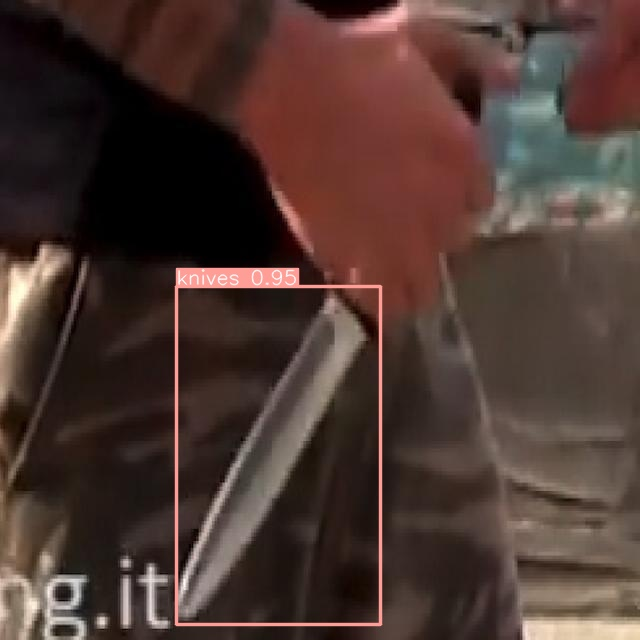

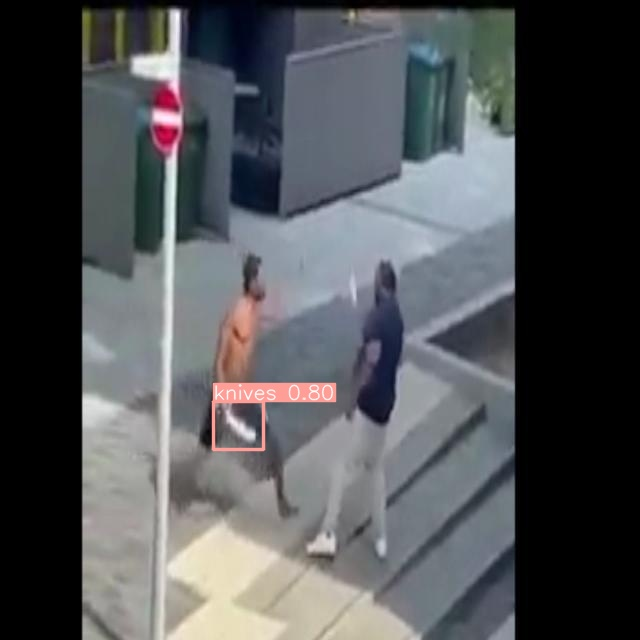

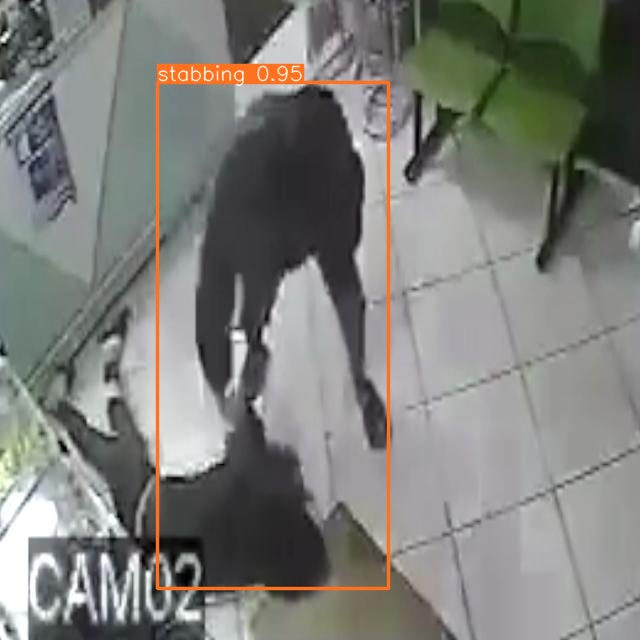

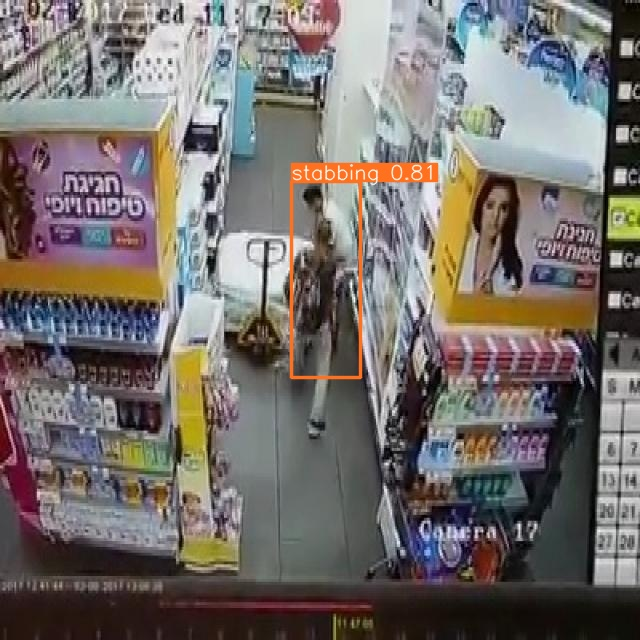

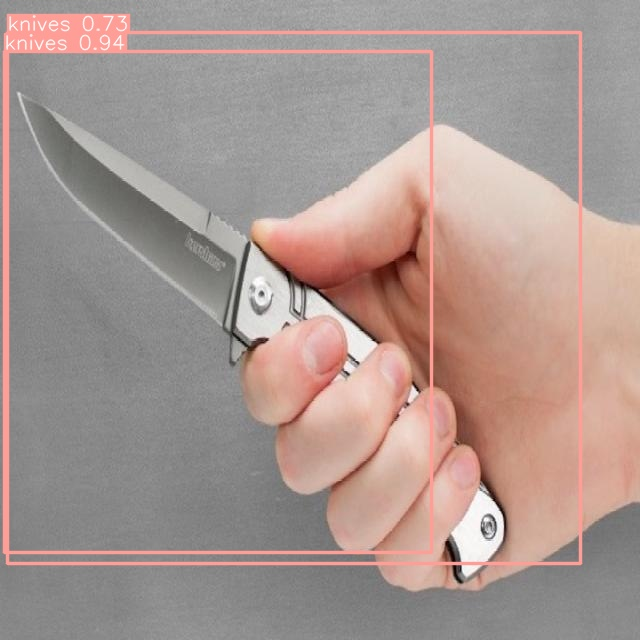

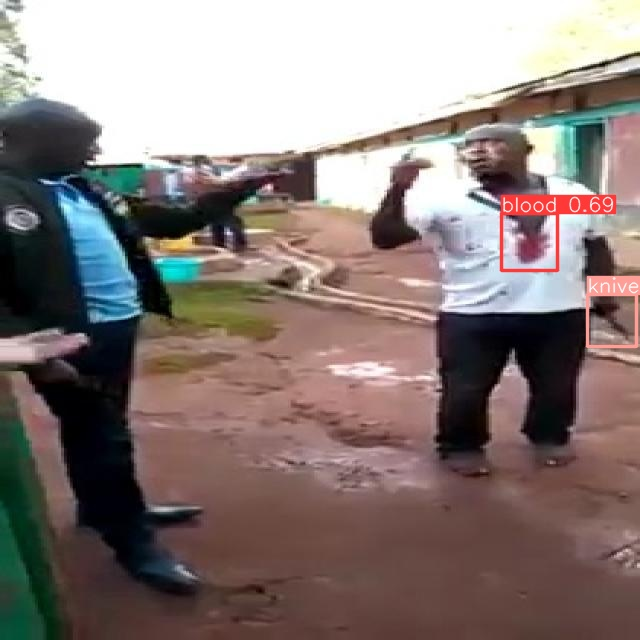

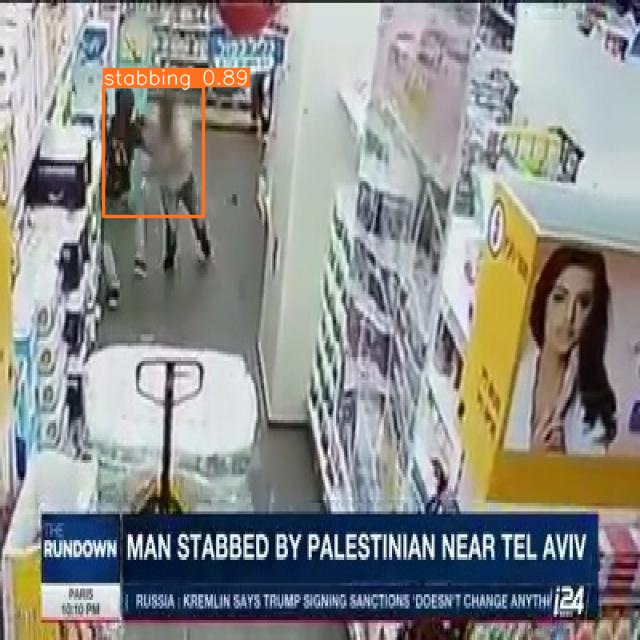

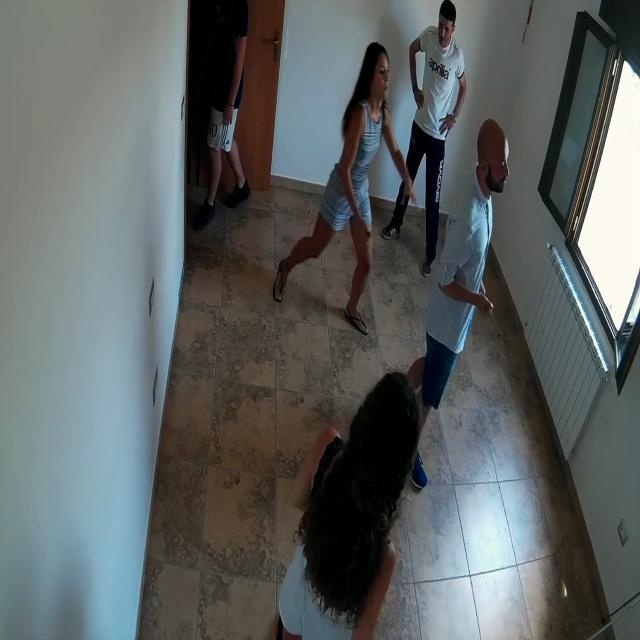

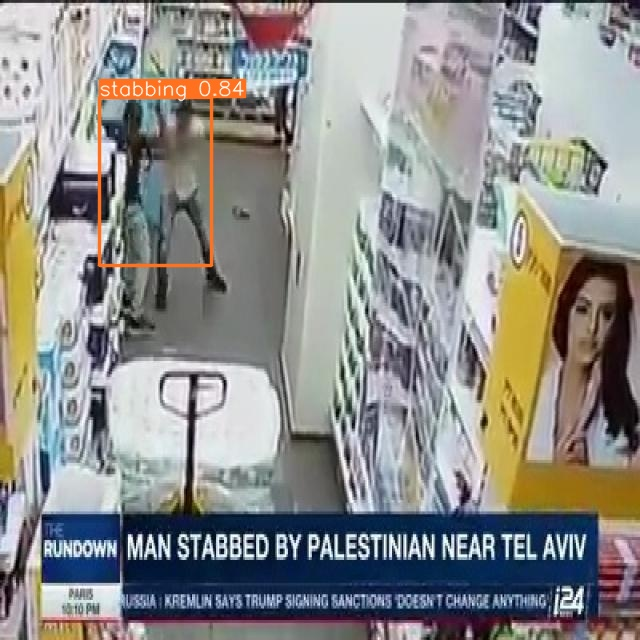

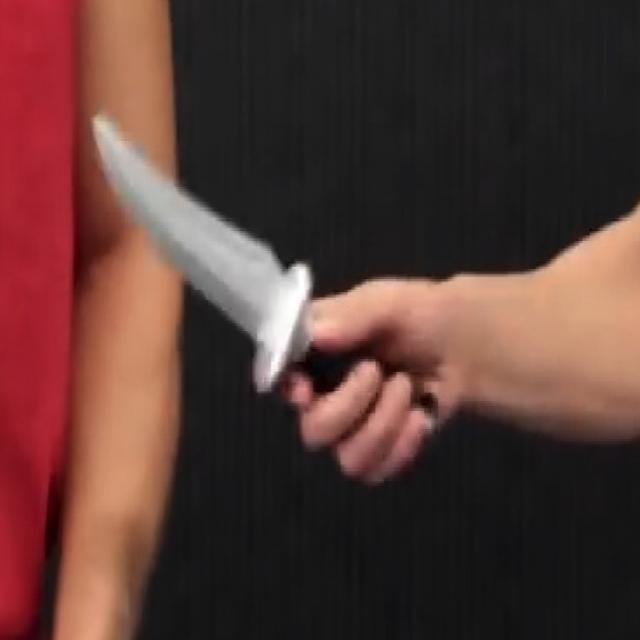

In [ ]:
predicted_images_dir = results[0].save_dir
image_count = 0
for image_path in os.listdir(predicted_images_dir):
    if image_path.endswith(('.jpg', '.png', '.jpeg')):
        display(Image(filename=os.path.join(predicted_images_dir, image_path), width=600))
        print("\n")
        image_count += 1
        if image_count >= 10:
            break


image 1/1 /content/rgb-0000048_jpg.rf.34fc94c5dfdad74c2b3efc8d513e2cb8.jpg: 640x640 1 knives, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


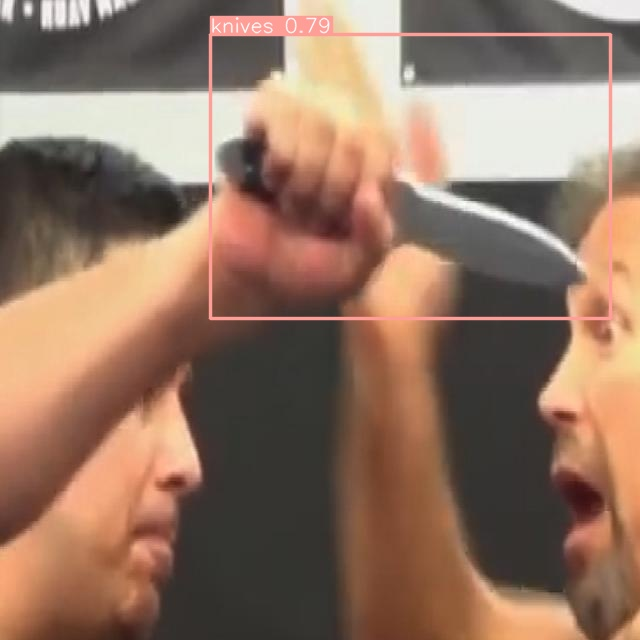

In [ ]:
model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)

# Directory containing the validation images
valid_images_dir = "/content/rgb-0000048_jpg.rf.34fc94c5dfdad74c2b3efc8d513e2cb8.jpg"

# Make predictions on the validation images
results = model(valid_images_dir, save=True, conf=0.1)

# Display the results
import os
from IPython.display import display, Image

# Get the path of the first predicted image
pred_image_dir = results[0].save_dir
pred_image_files = os.listdir(pred_image_dir)
pred_image_path = os.path.join(pred_image_dir, pred_image_files[0])

# Display the predicted image
display(Image(filename=pred_image_path, width=600))

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import os
import torch
import smtplib
import cv2
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email import encoders
from ultralytics import YOLO


model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)

# Email details
sender_email = "minhal.manjee@gmail.com"
sender_password = "fkqj jbvu kari kdeg"
receiver_email = "meezanact@gmail.com"

# Class mapping (adjust based on your model's output classes)
class_names = {
    0: "Blood",
    1: "Knife",
    2: "Stabbing"
}

def send_email_alert(image_path):
    """Sends an email alert with the detected image."""
    subject = "Alert: Hazard Detected!"
    body = f"A potential hazard has been detected in the image: {image_path}"

    # Set up the MIME message
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Attach the image to the email
    with open(image_path, "rb") as f:
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(f.read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', f"attachment; filename= {os.path.basename(image_path)}")
        msg.attach(part)

    # Send the email via SMTP
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, sender_password)
            text = msg.as_string()
            server.sendmail(sender_email, receiver_email, text)
            print(f"Email alert sent for: {image_path}")
            return True
    except Exception as e:
        print(f"Error sending email: {e}")
        return False

def display_image_with_boxes(image, boxes, save_path):
    """Display and save the image with bounding boxes and class names."""
    for *xyxy, conf, cls in boxes:
        class_id = int(cls)  # Convert class to integer
        if class_id in class_names:  # Check if the class ID is in the defined class names
            class_name = class_names[class_id]  # Get the class name
            x1, y1, x2, y2 = map(int, xyxy)  # Convert coordinates to integers
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{class_name}: {conf:.2f}"  # Use the class name in the label
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imwrite(save_path, image)

    return save_path

# Process images or video stream
def process_input(input_source):
    results = model(input_source)  # Perform prediction on the image

    print(f"Results: {results}")

    for result in results:
        print(f"Prediction data: {result.boxes.data}")

        image_path = result.path
        image = cv2.imread(image_path)

        for *xyxy, conf, cls in result.boxes.data:
            class_id = int(cls)  # Convert class to integer
            confidence = float(conf)

            print(f"Class ID: {class_id}, Confidence: {confidence}")

            # Check if any of the specified classes (knife, blood, stabbing) are detected
            if class_id in [0, 1, 2] and confidence > 0.5:  # IDs for knife, blood, stabbing (e.g., 0, 1, 2)
                print(f"**Alert**: Hazard detected in the image: {image_path}")
                print("💡 All lights turned on!")  # Example action for turning on lights

                save_path = "/content/annotated_image.jpg"
                annotated_image_path = display_image_with_boxes(image, result.boxes.data, save_path)

                email_sent = send_email_alert(annotated_image_path)
                if email_sent:
                    print("Email sent successfully!")
                else:
                    print("Failed to send email.")

                break

image_path = "/content/rgb-0000048_jpg.rf.34fc94c5dfdad74c2b3efc8d513e2cb8.jpg"
process_input(image_path)



image 1/1 /content/rgb-0000048_jpg.rf.34fc94c5dfdad74c2b3efc8d513e2cb8.jpg: 640x640 1 knives, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Results: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'blood', 1: 'knives', 2: 'stabbing'}
orig_img: array([[[175, 176, 180],
        [156, 157, 161],
        [174, 175, 179],
        ...,
        [235, 234, 236],
        [235, 234, 236],
        [235, 234, 236]],

       [[177, 178, 182],
        [159, 160, 164],
        [178, 179, 183],
        ...,
        [235, 234, 236],
        [235, 234, 236],
        [235, 234, 236]],

       [[179, 180, 184],
        [162, 163, 167],
        [183, 184, 188],
        ...,
        [235, 234, 236],
        [235, 234, 236],
        [235, 234, 236]],

       ...,

       [[ 85, 126, 188],
        [ 83, 124, 186],
        [ 82, 121, 183],
        ...,
        [106, 156, 214],
        [106, 159, 216],
        [107, 160, 217]],

       [[ 87, 127, 186],
        [ 84, 124, 183],
        [ 82, 122, 181],
        ...,
        [104, 154, 212],
        [10